In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs

In [2]:
df = pd.read_csv('data/notas.csv')

print(df.shape)
df.head(10)

(25, 4)


,prova1,prova2,prova3,final
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


In [6]:
#normalizing
x = df[['prova1', 'prova2', 'prova3']].values
y = df['final'].values.reshape(-1, 1)

print(x.shape, y.shape)

minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

(25, 3) (25, 1)


Implementing the Adaline neuron into a regression problem

In [5]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)]
b = 2*random() - 1

learning_rate = 1e-2

for step in range(2001):
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = sum([x_i*w_i for x_i, w_i in zip(x_n, w)]) + b
        error = y_n - y_pred
        w = [w_i + learning_rate*error*x_i for x_i, w_i in zip(x_n, w)]
        b = b + learning_rate*error
        cost += error**2
        
    if step%200 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)

step 0: [509202.99027365]
step 200: [172.9093383]
step 400: [148.32590154]
step 600: [146.3974244]
step 800: [146.18076849]
step 1000: [146.15422604]
step 1200: [146.15102576]
step 1400: [146.15068086]
step 1600: [146.15065966]
step 1800: [146.15066513]
step 2000: [146.15066876]
w:  [array([8.72519406]), array([14.13948935]), array([26.32051174])]
b:  [150.71119359]


In [7]:
#Comparing our implementation with sklearn linear regression
reg  = LinearRegression()

reg.fit(x,y)

print("w: ", reg.coef_)
print("b: ", reg.intercept_)

w:  [[ 8.72048636 14.1054877  26.26749487]]
b:  [150.65175754]


Classification

In [8]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# y = np.array([[0, 1, 1, 1]]).T # porta OR
y = np.array([0, 0, 0, 1]).T # porta AND

print(x.shape, y.shape)

(4, 2) (4,)


In [9]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)]
b = 2*random() - 1

learning_rate = 1e-1# <- tente estimar a learning_rate

for step in range(101):
    cost = 0
    for x_n, y_n in zip(x, y):
        # qual linha devemos remover para transformar o Perceptron num Adaline?
        y_pred = sum([x_i*w_i for x_i, w_i in zip(x_n, w)]) + b
        error = y_n - y_pred
        w = [w_i + learning_rate*error*x_i for x_i, w_i in zip(x_n, w)]
        b = b + learning_rate*error
        cost += error**2
        
    if step%10 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)

step 0: 1.3596679316201652
step 10: 0.4000814036193173
step 20: 0.3270205164125688
step 30: 0.31227066494865785
step 40: 0.30917811303261233
step 50: 0.3085934746164948
step 60: 0.30853567684440497
step 70: 0.30856683907175836
step 80: 0.30859831772275803
step 90: 0.30861839036233485
step 100: 0.30862964852463914
w:  [0.555264684762113, 0.5274616264095612]
b:  -0.27736821734319417


Classification Exercise

(100, 2) (100,)


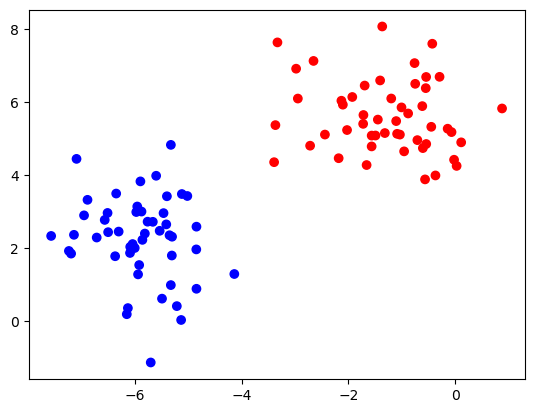

In [10]:
x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

In [11]:
def plot_linear_classifier(x, y, w, b):
    x1_min, x1_max = x[:,0].min(), x[:,0].max()
    x2_min, x2_max = x[:,1].min(), x[:,1].max()

    x1, x2 = np.meshgrid(np.linspace(x1_min-1, x1_max+1,100), np.linspace(x2_min-1, x2_max+1, 100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T

    plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

    y_mesh = np.dot(x_mesh, np.array(w).reshape(1, -1).T) + b
    y_mesh = np.where(y_mesh < 0.5, 0, 1)

    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr', alpha=0.5)
    plt.xlim(x1_min-1, x1_max+1)
    plt.ylim(x2_min-1, x2_max+1)

step 0: 532.5267379392692
step 100: 3.387452521991459
step 200: 2.7108972105689793
step 300: 2.3936758744703868
step 400: 2.2450245392782096
step 500: 2.1754252058486028
step 600: 2.142879171246713
step 700: 2.127687985073827
step 800: 2.120616599910103
step 900: 2.1173381901440913
step 1000: 2.1158274342859613
w:  [0.14072251719335188, 0.08017219015871838]
b:  0.682863397024853


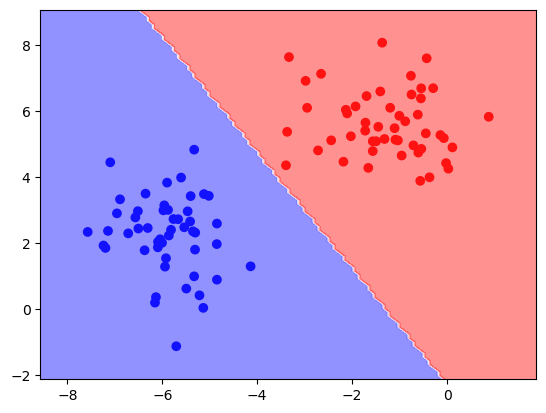

In [12]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)]
b = 2*random() - 1

learning_rate = 1e-3 # <- tente estimar a learning_rate

for step in range(1001): # <- tente estimar a #epochs
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = sum([x_i*w_i for x_i, w_i in zip(x_n, w)]) + b
        error = y_n - y_pred
        w = [w_i + learning_rate*error*x_i for x_i, w_i in zip(x_n, w)]
        b = b + learning_rate*error
        cost += error**2
        
    if step%100 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)

plot_linear_classifier(x, y, w, b)